# Autoencoder

## Build Autoencoder

In [376]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import tensorflow as tf
import platform

In [377]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Python Platform: macOS-13.0-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.10 | packaged by conda-forge | (main, Mar 24 2023, 20:12:31) [Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.2
GPU is available


In [378]:
# Load the original training data 
import numpy as np
original_train = np.load('/Users/xinyu/Downloads/32_original_train_data.npy')

In [379]:
print(original_train)

[[[[ 42  59 106]
   [ 39  54  96]
   [ 35  51  78]
   ...
   [ 42  81 137]
   [ 49  85 136]
   [ 68 112 176]]

  [[ 47  66 106]
   [ 41  58  91]
   [ 32  53  88]
   ...
   [ 23  56  93]
   [ 19  49  61]
   [ 30  68  84]]

  [[ 48  71 114]
   [ 37  63  95]
   [ 28  58  97]
   ...
   [ 27  57  88]
   [ 18  49  61]
   [ 20  54  67]]

  ...

  [[ 31  51  94]
   [ 38  55  91]
   [ 31  46  81]
   ...
   [ 33  66  92]
   [ 41  67 100]
   [ 40  70  99]]

  [[ 43  61  98]
   [ 43  59 100]
   [ 51  64 107]
   ...
   [ 44  75 104]
   [ 57  82 118]
   [ 43  70 103]]

  [[ 52  78 116]
   [ 49  74 123]
   [ 54  78 123]
   ...
   [ 47  82 111]
   [ 33  61  85]
   [ 31  57  81]]]


 [[[218 214 184]
   [255 255 251]
   [255 255 255]
   ...
   [ 23  21  22]
   [ 21  18  20]
   [ 22  19  20]]

  [[212 209 189]
   [255 255 253]
   [255 255 255]
   ...
   [ 20  18  20]
   [ 20  18  19]
   [ 23  18  19]]

  [[207 204 189]
   [255 255 255]
   [255 255 255]
   ...
   [ 20  18  20]
   [ 20  18  19]
   [ 22  18

In [380]:
print(original_train.shape)

(39209, 32, 32, 3)


In [381]:
original_train =original_train.astype('float32')/255.0 

In [382]:
max_value = np.max(original_train)
min_value = np.min(original_train)
print("Maximum pixel value:", max_value)
print("Minimum pixel value:", min_value)

Maximum pixel value: 1.0
Minimum pixel value: 0.0


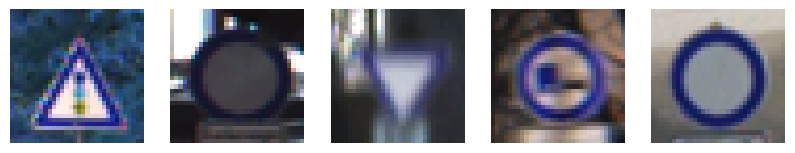

In [383]:
num_images = 5
images = original_train[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [384]:
# Load the data with noise added
noisy_train = np.load('/Users/xinyu/Downloads/noisy_training (1).npy')

In [385]:
print(noisy_train)

[[[[0.11738464 0.21682313 0.47036512]
   [0.17213643 0.17029966 0.41714711]
   [0.14496471 0.15895694 0.26941353]
   ...
   [0.12211153 0.29303627 0.51752302]
   [0.21823347 0.35052474 0.50900094]
   [0.21635036 0.45870752 0.72255326]]

  [[0.19419141 0.18137253 0.35908541]
   [0.25025648 0.16781752 0.37745698]
   [0.19881568 0.18043832 0.32118229]
   ...
   [0.02606503 0.23579391 0.32946364]
   [0.07770142 0.21337666 0.18326294]
   [0.08606485 0.23480759 0.3941413 ]]

  [[0.11061277 0.35589319 0.46442945]
   [0.14149646 0.24744214 0.41269719]
   [0.0421285  0.17975907 0.32850885]
   ...
   [0.         0.31713171 0.41365641]
   [0.07479405 0.18780831 0.251683  ]
   [0.0466092  0.28835096 0.26462841]]

  ...

  [[0.         0.2217554  0.38797366]
   [0.1506228  0.22983207 0.331004  ]
   [0.13429061 0.1220915  0.34057358]
   ...
   [0.17399049 0.24452267 0.39919871]
   [0.18445023 0.36050062 0.40243435]
   [0.08904837 0.28683013 0.38611621]]

  [[0.14734004 0.22297769 0.35441355]
   [0.1

In [386]:
# Find the range of pixel values in the image data
max_value = np.max(noisy_train)
min_value = np.min(noisy_train)
print("Maximum pixel value:", max_value)
print("Minimum pixel value:", min_value)

Maximum pixel value: 1.0
Minimum pixel value: 0.0


In [387]:
# Calculate the mean and standard deviation of the pixel values
pixel_mean = np.mean(noisy_train)
pixel_std = np.std(noisy_train)

print("Pixel mean:", pixel_mean)
print("Pixel standard deviation:", pixel_std)

Pixel mean: 0.47371368815656695
Pixel standard deviation: 0.2374526743147402


In [388]:
# Get the shape of the data
print(noisy_train.shape)

(39209, 32, 32, 3)


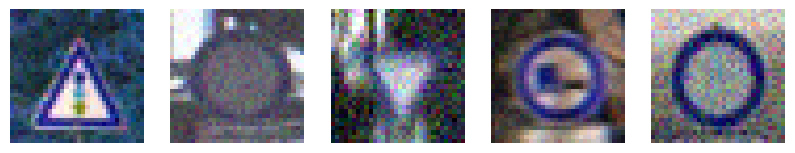

In [389]:
num_images = 5
images = noisy_train[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [390]:
# Split the noisy data into training and testing sets

n_original = original_train.shape[0]
n_train = int(n_original * 0.9)
n_test = n_original - n_train

x_train_noisy = noisy_train[:n_train]
x_train_original = original_train[:n_train]
x_test_noisy = noisy_train[n_train:]
x_test_original = original_train[n_train:]


In [391]:

print(n_original)
print(n_train)
print(n_test)


39209
35288
3921


In [392]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [393]:
# Encoder
input_shape = (32, 32, 3)
input_img = Input(shape=input_shape)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(32, (1, 1), activation='relu', padding='same')(x)


In [394]:
# LATENT SPACE
latentSize = (4,4,32)

In [395]:
# Decoder
direct_input = Input(shape=latentSize)
x = Conv2D(192, (1, 1), activation='relu', padding='same')(direct_input)
x = UpSampling2D((2, 2))(x)
x = Conv2D(192, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(96, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(48, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [396]:
# Define the model
encoder = Model(input_img, encoded)
decoder = Model(direct_input, decoded)
autoencoder = Model(input_img, decoder(encoded))

autoencoder.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_29 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_112 (Conv2D)         (None, 32, 32, 48)        1344      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 16, 16, 48)       0         
 g2D)                                                            
                                                                 
 conv2d_113 (Conv2D)         (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 8, 8, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_114 (Conv2D)         (None, 8, 8, 192)         166

In [397]:
# Compile the model
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')

## Train Autoencoder

In [407]:
# Train the model
autoencoder.fit(x_train_noisy, x_train_original, epochs=10)

Epoch 1/10
1103/1103 [==============================] - 73s 66ms/step - loss: 0.4869
Epoch 2/10
1103/1103 [==============================] - 69s 62ms/step - loss: 0.4803
Epoch 3/10
1103/1103 [==============================] - 71s 65ms/step - loss: 0.4767
Epoch 4/10
1103/1103 [==============================] - 72s 65ms/step - loss: 0.4742
Epoch 5/10
1103/1103 [==============================] - 68s 62ms/step - loss: 0.4728
Epoch 6/10
1103/1103 [==============================] - 69s 62ms/step - loss: 0.4713
Epoch 7/10
1103/1103 [==============================] - 72s 65ms/step - loss: 0.4705
Epoch 8/10
1103/1103 [==============================] - 88s 80ms/step - loss: 0.4696
Epoch 9/10
1103/1103 [==============================] - 73s 66ms/step - loss: 0.4689
Epoch 10/10
1103/1103 [==============================] - 80s 72ms/step - loss: 0.4678


In [408]:
# save the trained model
autoencoder.save('denoising_autoencoder.h5')

## Evaluation

### View Reconstruction

In [409]:
"""
# Load the original testing data
original_test = np.load('/Users/xinyu/Downloads/32_original_test_data.npy')
"""

"\n# Load the original testing data\noriginal_test = np.load('/Users/xinyu/Downloads/32_original_test_data.npy')\n"

In [410]:
"""
print(original_test.shape)
"""

'\nprint(original_test.shape)\n'

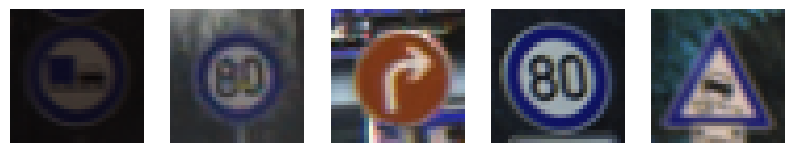

In [411]:
# Testing original images
num_images = 5
images = x_test_original[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

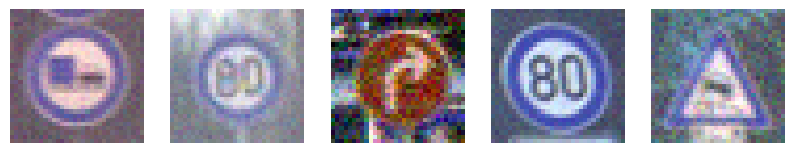

In [412]:
# Testing noisy images
num_images = 5
images = x_test_noisy[:num_images]

# Display the images
fig, axs = plt.subplots(1, num_images, figsize=(10, 10))
for i in range(num_images):
    axs[i].imshow(images[i])
    axs[i].axis('off')
plt.show()

In [413]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [414]:
# Load the trained denoising autoencoder model
loaded_autoencoder = tf.keras.models.load_model('denoising_autoencoder.h5')

In [415]:
# Use the denoising autoencoder to reconstruct the testing data
test_reconstructed = loaded_autoencoder.predict(x_test_noisy)

123/123 [==============================] - 4s 27ms/step


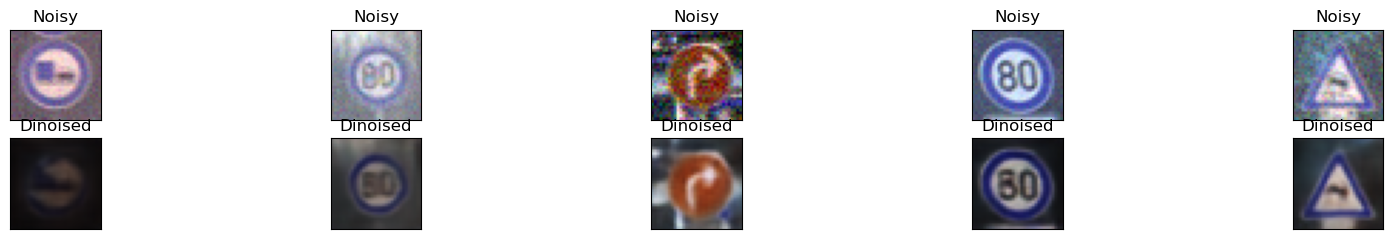

In [427]:
# Visualize the original testing data and the reconstructed data
n = 5  # Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i])
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(test_reconstructed[i])
    plt.title('Dinoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()    

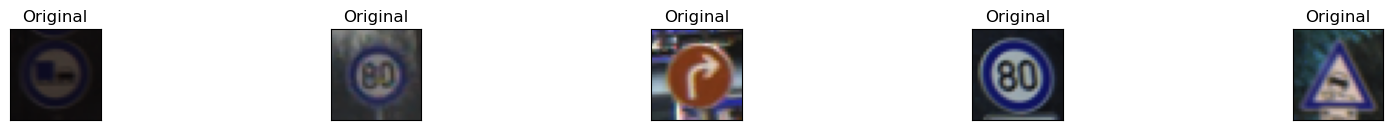

In [429]:
 # Original images for comparison
n = 5 
plt.figure(figsize=(20, 4))
for i in range(n):  
    ax = plt.subplot(3, n, i + n + 1)
    plt.imshow(x_test_original[i])
    plt.title('Original')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()  

### Check The Order

In [430]:
test_reconstructed_c = loaded_autoencoder.predict(x_test_original)

123/123 [==============================] - 3s 26ms/step


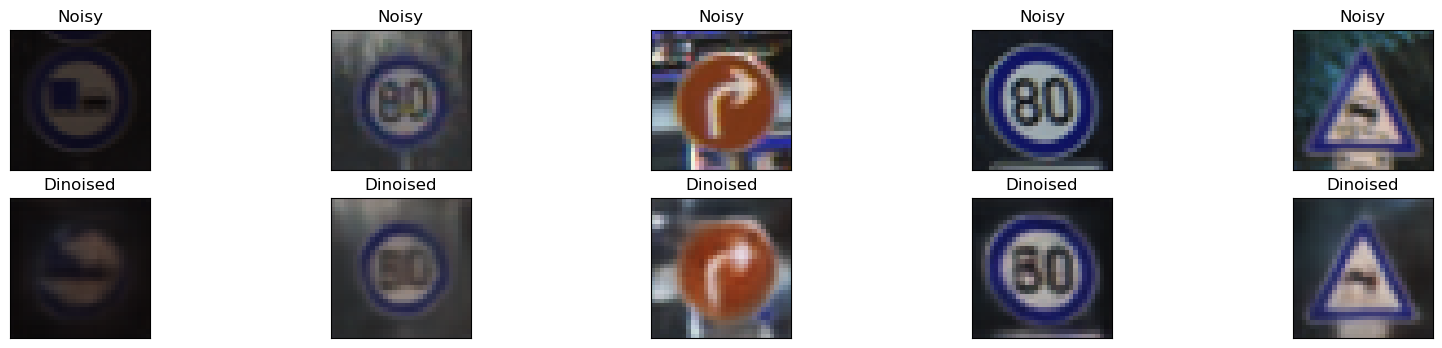

In [431]:
n = 5  # Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_original[i])
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(test_reconstructed_c[i])
    plt.title('Dinoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()    

### Metrics

We also measure the reconstruction error between the original testing data and the output of the Denoising autoencoder. This method used mean squared error (MSE), and the lower the reconstruction loss, the better the DAE is at denoising the input.

In [432]:
mse_loss = np.mean(np.square(x_test_original - test_reconstructed))
print("MSE loss:", mse_loss)

MSE loss: 0.005151561


Structural Similarity Index (SSIM): SSIM measures the similarity between the original input and the reconstructed output based on three factors: luminance, contrast, and structure. A higher SSIM indicates better performance.

In [433]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


## Save The Denoised Images

In [434]:
# Use the trained model to denoise the original data (input)
original_train_denoised = loaded_autoencoder.predict(noisy_train)

1226/1226 [==============================] - 33s 27ms/step


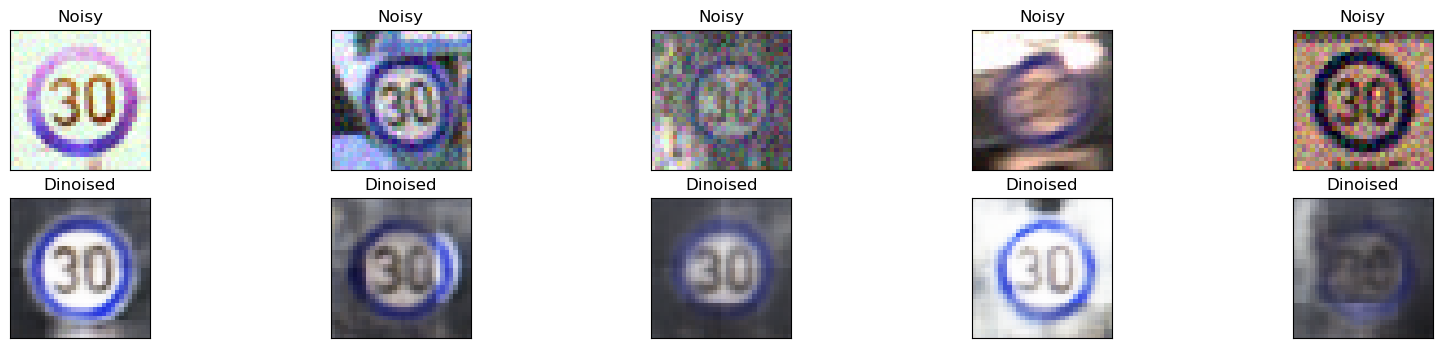

In [305]:
# Visualize the original data and the denoised data
n = 5  # Number of images to visualize
plt.figure(figsize=(20, 4))
for i in range(n):
    
    # Noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(noisy_train[i])
    plt.title('Noisy')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Reconstructed images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(original_train_denoised[i])
    plt.title('Dinoised')
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()    

In [ ]:
# Save the denoised output to a NumPy array file
np.save('denoised_data.npy', original_train_denoised)